sklearn, auc:  0.7916666666666667
sklearn, auc:  0.7916666666666667


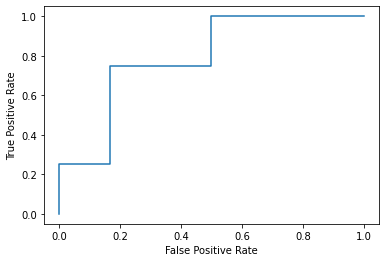

In [8]:
# ref link: 
# - https://www.zhihu.com/tardis/zm/art/500806744?source_id=1005
# - https://zhuanlan.zhihu.com/p/360765777
#--------------------------------------------------------------------- #

# 1）sklearn的标准答案
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score

##给定的真实y 和 预测y_pred
y_true = np.array([1, 0, 0, 0, 1,0, 1,0,0, 1])
y_pred = np.array([0.9, 0.4, 0.3, 0.1, 0.35, 0.6, 0.65, 0.32, 0.8, 0.7])

fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred, pos_label=1)
print("sklearn, auc: ", metrics.auc(fpr, tpr))
print("sklearn, auc: ", roc_auc_score(y_true, y_pred))


# ------- 绘制下上述AUC的曲线
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [6]:
# 2) 暴力穷举法：AUC = 正样本排在负样本前面 = cnt(正>负) / cnt_all_pair，两重for循环 o(n2)
import numpy as np
from sklearn import metrics

##给定的真实y 和 预测y_pred
y_true    = np.array([1,   0,   0,   0,   1,    0,   1,    0,    0,   1  ])
y_pred = np.array([0.9, 0.4, 0.3, 0.1, 0.35, 0.6, 0.65, 0.32, 0.8, 0.7])

numerator = 0    #分子
denominator = 0  #分母

for i in range(0, len(y_true)-1):
    for j in range(i, len(y_true)):
        if y_true[i] != y_true[j]: # 待比较两个元素则跳过计算，当且仅当不同时才计算
            denominator += 1
            #统计所有正负样本对中，模型把相对位置排序正确的数量
            if(y_true[i]>y_true[j] and y_pred[i]>y_pred[j]) or (y_true[i]<y_true[j] and y_pred[i]<y_pred[j]):
                numerator += 1

print("AUC = " , numerator/denominator)

AUC =  0.7916666666666666


In [10]:
# 3) 先排序，然后基于公式计算，时间复杂度为o(nlogn)。原理参考 https://zhuanlan.zhihu.com/p/545077644 和 https://zhuanlan.zhihu.com/p/360765777
# 当前版本基于pandas实现
import numpy as np
import pandas as pd 

##给定的真实y 和 预测y_pred
y_true = np.array([1,   0,   0,   0,   1,    0,   1,    0,    0,   1  ])
y_pred = np.array([0.9, 0.4, 0.3, 0.1, 0.35, 0.6, 0.65, 0.32, 0.8, 0.7])

def cal_auc(y_true, y_pred):
    pair = list(zip(y_true, y_pred))
    pair = sorted(pair, key=lambda x: x[1]) # 依据y_pred正排序
    df = pd.DataFrame([[x[0], x[1], i+1] for i,x in enumerate(pair)], columns=['y_true', 'y_pred', 'rank'])
    # 将pred相同的item的rank设置为均值, 重新编序
    for k,v in df.y_pred.value_counts().items(): #(value, counts)
        if v==1: continue # pred仅出现一次的跳过

        rank_mean = df[df.y_pred==k]['rank'].mean() # pred相同的item,求这些item的rank的均值
        df.loc[df.y_pred==k, 'rank'] = rank_mean # 设置成均值
    # 
    df_pos = df[df.y_true==1] # 正样本构成的list
    M = df_pos.shape[0] # 正样本个数
    N = df.shape[0] - M # 负样本个数
    sigma_rank_pos = df_pos['rank'].sum()
    #
    numerator = sigma_rank_pos - (M*(M+1))/2    # 分子
    denominator = M * N #  分母
    auc = numerator / denominator 

    return auc

print("AUC = " , cal_auc(y_true, y_pred))

AUC =  0.7916666666666666
